In [30]:
# Based on https://lablab.ai/t/stable-diffusion-inpainting
from torch import autocast
import torch
from diffusers import StableDiffusionInpaintPipeline as StableDiffusionInpaintPipeline

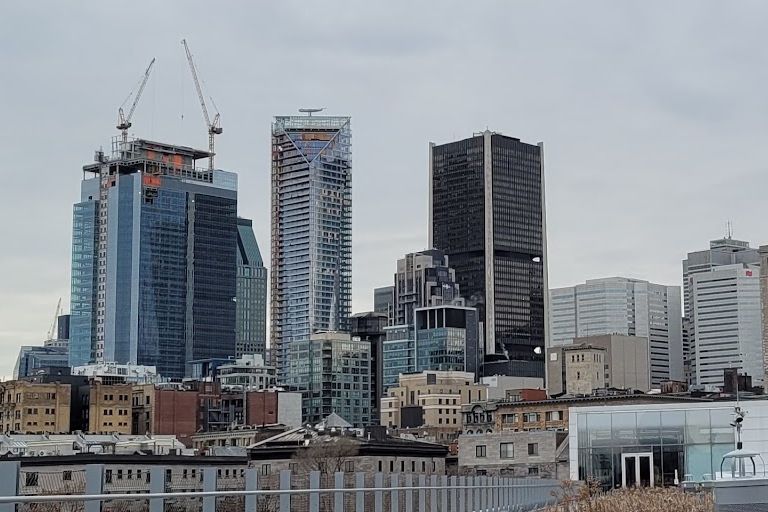

In [2]:

from PIL import Image
init_img = Image.open("/home/pawel/git/NeuralNetworksSketchbook/city.jpg").convert("RGB")
init_img

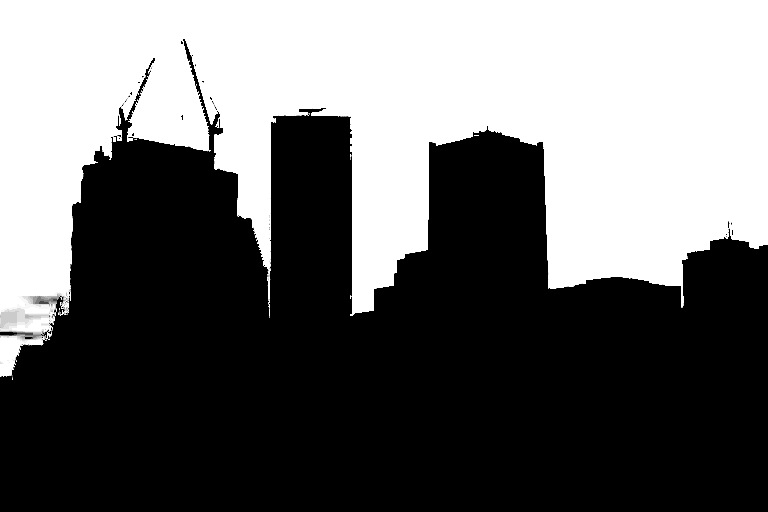

In [3]:
mask = Image.open("/home/pawel/git/NeuralNetworksSketchbook/city_mask.jpg").convert("RGB")
mask

In [22]:
device = "cuda"
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    revision="fp16",
    torch_dtype=torch.float16
).to(device)

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

/home/pawel/projekty/aiart/venv/lib/python3.8/site-packages/diffusers/utils/deprecation_utils.py:35: FutureWarning: You are using a legacy checkpoint for inpainting with Stable Diffusion, therefore we are loading the <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_inpaint_legacy.StableDiffusionInpaintPipelineLegacy'> class instead of <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_inpaint.StableDiffusionInpaintPipeline'>. For better inpainting results, we strongly suggest using Stable Diffusion's official inpainting checkpoint: https://huggingface.co/runwayml/stable-diffusion-inpainting instead or adapting your checkpoint CompVis/stable-diffusion-v1-4 to the format of https://huggingface.co/runwayml/stable-diffusion-inpainting. Note that we do not actively maintain the {StableDiffusionInpaintPipelineLegacy} class and will likely remove it in version 1.0.0.
  warnings.warn(warning + message, FutureWarning)


  0%|          | 0/41 [00:00<?, ?it/s]

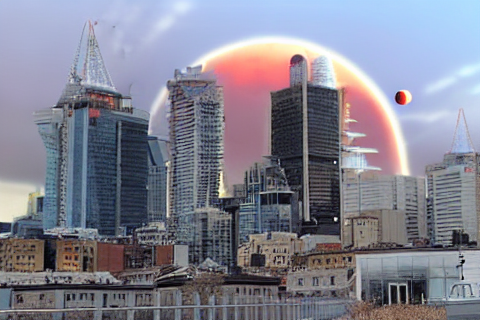

In [60]:
init_img_ = init_img.copy()
mask_ = mask.copy()
size = [2*i/3 for i in init_img.size]
init_img_.thumbnail(size, Image.Resampling.LANCZOS)
mask_.thumbnail(size, Image.Resampling.LANCZOS)
with autocast("cuda"):
    images = pipe(prompt="A red sky from out of space, with puffy clouds and two moons, trending on artstation, profesional", init_image=init_img_, mask_image=mask_, strength=0.8).images
images[0]

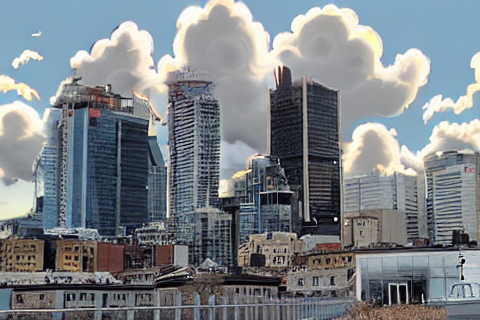

In [49]:
images[0]

In [90]:
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation
from PIL import Image
import requests

feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")

image = Image.open("/home/pawel/git/NeuralNetworksSketchbook/car.jpg").convert("RGB")
inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits

In [96]:
i = 0

In [286]:
import numpy as np
# Overlay colormap on mask

from torch import nn

upsampled_logits = nn.functional.interpolate(logits,
                size=(image.size[1], image.size[0]), # (height, width)
                mode='bilinear',
                align_corners=False)

predicted_mask = upsampled_logits.argmax(dim=1).cpu().numpy()[0]
#for i,c in color_map.items():

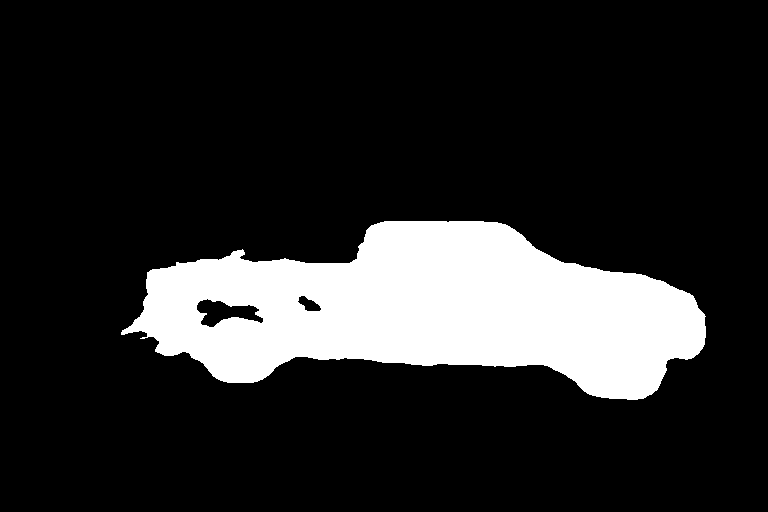

In [287]:
i = 20
vis = np.zeros(predicted_mask.shape + (3,))
vis[predicted_mask == i] = [255, 255, 255]

mask = Image.fromarray(vis.astype(np.uint8)) # covert to pillow image.
mask = mask.resize(image.size) # resize to original image size
mask

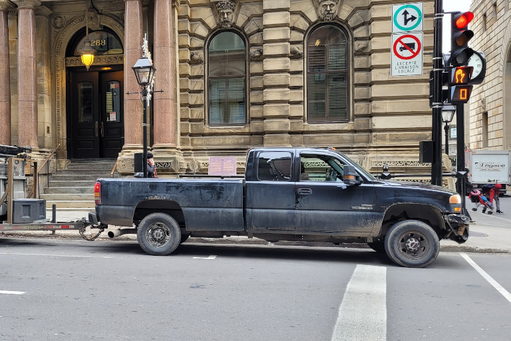

In [288]:
init_img = Image.open("/home/pawel/git/NeuralNetworksSketchbook/car.jpg").convert("RGB")
init_img_ = init_img.copy()
mask_ = mask.copy()
size = [2*i/3 for i in init_img.size]
init_img_.thumbnail(size, Image.Resampling.LANCZOS)
mask_.thumbnail(size, Image.Resampling.LANCZOS)
init_img_

  0%|          | 0/21 [00:00<?, ?it/s]

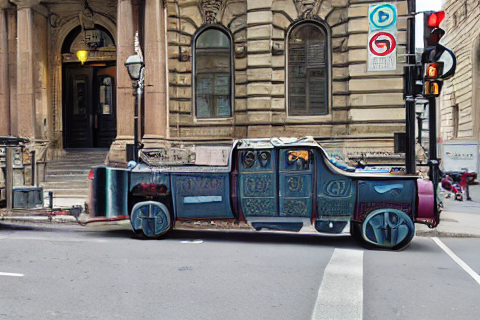

In [192]:
with autocast("cuda"):
    images = pipe(prompt="A steampunk train, highly detailed, professional", init_image=init_img_, mask_image=mask_, strength=0.4).images
images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

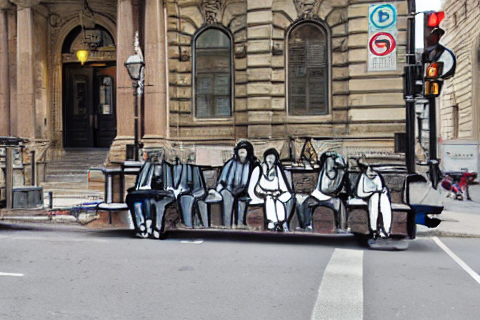

In [231]:
with autocast("cuda"):
    images = pipe(prompt="A sketch of a crowd waiting for a bus, sitting, highly detailed, professional", init_image=init_img_, mask_image=mask_, strength=1.0).images
images[0]

  0%|          | 0/46 [00:00<?, ?it/s]

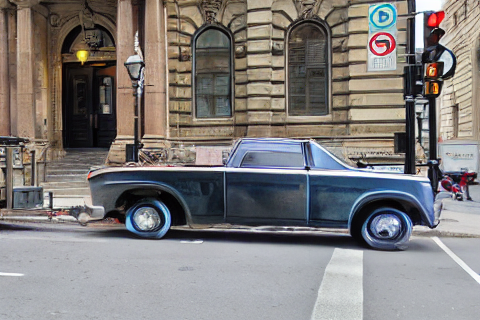

In [282]:
with autocast("cuda"):
    images = pipe(prompt="A toy car, highly detailed, professional",  num_inference_steps=75, guidance_scale=3.5, init_image=init_img_, mask_image=mask_, strength=0.6).images
images[0]

In [31]:
# SD 2.0

model_id = "stabilityai/stable-diffusion-2"
device = "cuda"
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    revision="fp16",
    torch_dtype=torch.float16
).to(device)

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

/home/pawel/projekty/aiart/venv/lib/python3.8/site-packages/diffusers/utils/deprecation_utils.py:35: FutureWarning: You are using a legacy checkpoint for inpainting with Stable Diffusion, therefore we are loading the <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_inpaint_legacy.StableDiffusionInpaintPipelineLegacy'> class instead of <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_inpaint.StableDiffusionInpaintPipeline'>. For better inpainting results, we strongly suggest using Stable Diffusion's official inpainting checkpoint: https://huggingface.co/runwayml/stable-diffusion-inpainting instead or adapting your checkpoint CompVis/stable-diffusion-v1-4 to the format of https://huggingface.co/runwayml/stable-diffusion-inpainting. Note that we do not actively maintain the {StableDiffusionInpaintPipelineLegacy} class and will likely remove it in version 1.0.0.
  warnings.warn(warning + message, FutureWarning)


  0%|          | 0/41 [00:00<?, ?it/s]

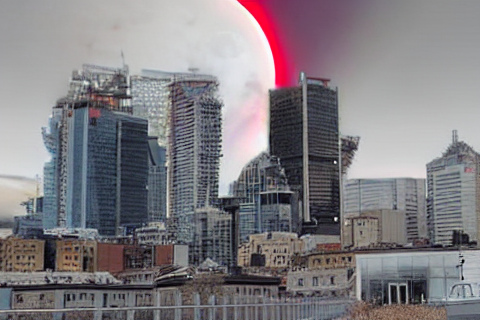

In [5]:
init_img_ = init_img.copy()
mask_ = mask.copy()
size = [2*i/3 for i in init_img.size]
init_img_.thumbnail(size, Image.Resampling.LANCZOS)
mask_.thumbnail(size, Image.Resampling.LANCZOS)
with autocast("cuda"):
    images = pipe(prompt="A red sky from out of space, with puffy clouds and two moons, trending on artstation, profesional", init_image=init_img_, mask_image=mask_, strength=0.8).images
images[0]

In [10]:
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation
from PIL import Image
import requests

feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")

image = Image.open("/home/pawel/git/NeuralNetworksSketchbook/car.jpg").convert("RGB")
inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits

/home/pawel/projekty/aiart/venv/lib/python3.8/site-packages/transformers/models/segformer/image_processing_segformer.py:102: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


In [12]:
import numpy as np
# Overlay colormap on mask

from torch import nn

upsampled_logits = nn.functional.interpolate(logits,
                size=(image.size[1], image.size[0]), # (height, width)
                mode='bilinear',
                align_corners=False)

predicted_mask = upsampled_logits.argmax(dim=1).cpu().numpy()[0]
#for i,c in color_map.items():

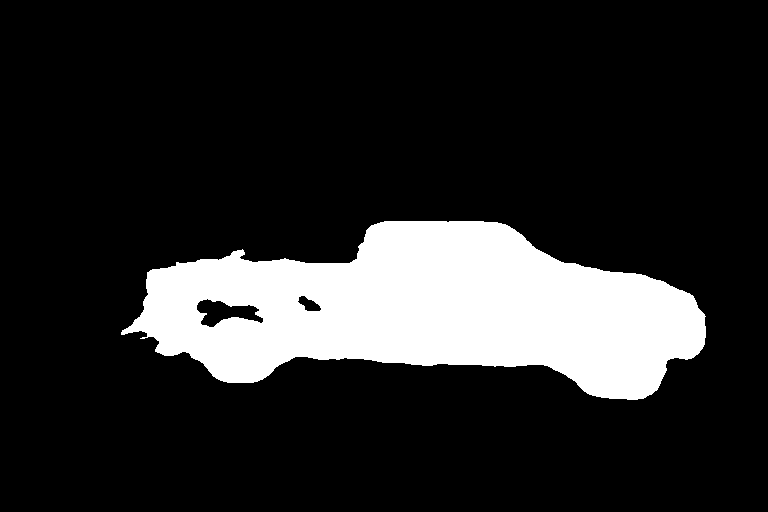

In [13]:
import numpy as np
i = 20
vis = np.zeros(predicted_mask.shape + (3,))
vis[predicted_mask == i] = [255, 255, 255]

mask = Image.fromarray(vis.astype(np.uint8)) # covert to pillow image.
mask = mask.resize(image.size) # resize to original image size
mask

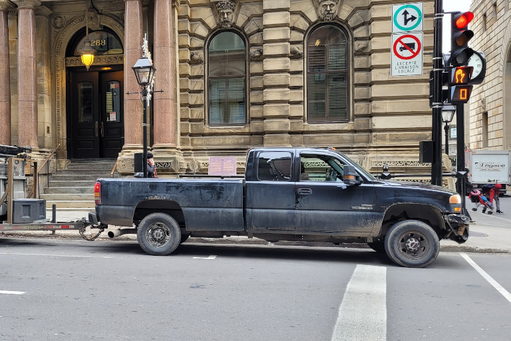

In [14]:
init_img = Image.open("/home/pawel/git/NeuralNetworksSketchbook/car.jpg").convert("RGB")
init_img_ = init_img.copy()
mask_ = mask.copy()
size = [2*i/3 for i in init_img.size]
init_img_.thumbnail(size, Image.Resampling.LANCZOS)
mask_.thumbnail(size, Image.Resampling.LANCZOS)
init_img_

  0%|          | 0/21 [00:00<?, ?it/s]

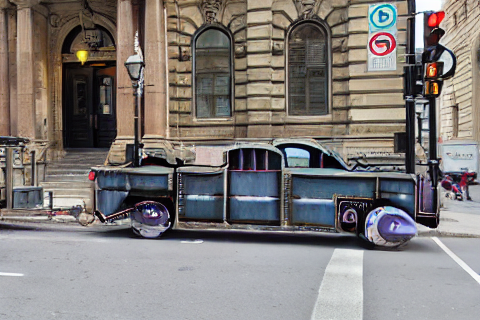

In [17]:
with autocast("cuda"):
    images = pipe(prompt="A steampunk train, highly detailed, professional", init_image=init_img_, mask_image=mask_, strength=0.4).images
images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

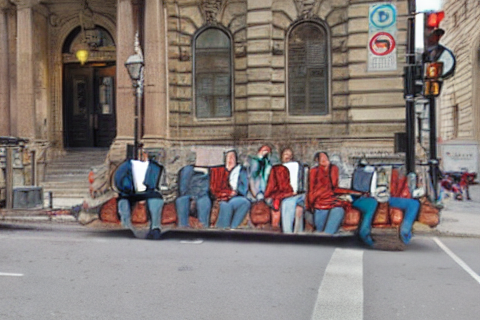

In [25]:
with autocast("cuda"):
    images = pipe(prompt="A sketch of a crowd waiting for a bus, sitting, highly detailed, professional", init_image=init_img_, mask_image=mask_, strength=1.0).images
images[0]

  0%|          | 0/46 [00:00<?, ?it/s]

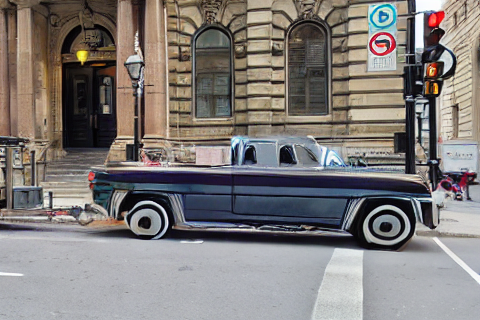

In [29]:
with autocast("cuda"):
    images = pipe(prompt="A photo of a toy car, highly detailed, professional",  num_inference_steps=75, guidance_scale=3.5, init_image=init_img_, mask_image=mask_, strength=0.6).images
images[0]

In [32]:

dir(pipe)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_deprecated_kwargs',
 '_dict_from_json_file',
 '_encode_prompt',
 '_execution_device',
 '_get_init_keys',
 '_get_signature_keys',
 '_internal_dict',
 '_optional_components',
 'check_inputs',
 'components',
 'config',
 'config_name',
 'decode_latents',
 'device',
 'disable_attention_slicing',
 'disable_xformers_memory_efficient_attention',
 'enable_attention_slicing',
 'enable_sequential_cpu_offload',
 'enable_xformers_memory_efficient_attention',
 'extract_init_dict',
 'feature_extractor',
 'from_config',
 'from_pretrained',
 'get_config_dict',
 'get_timesteps',
 'has_compatibles',
 'ignore_for_config',
 'lo